In [5]:
import numpy as np

In [6]:
sentence = "Your journey is one step at a time"

In [7]:
vector = np.random.randn(8,3)
vector

array([[-0.30650403, -1.86224877, -1.72032529],
       [-1.26250171,  1.44306446,  1.09741042],
       [ 1.20356015,  0.32156097, -0.56189089],
       [-2.02178053,  1.99575316,  1.62464945],
       [-1.20940494,  0.80187458,  0.71823093],
       [ 0.18597543,  1.77358677, -0.81880388],
       [-2.56523342,  0.93717837, -1.05611433],
       [ 0.90141002,  0.48941773, -0.01763498]])

In [27]:
idx2word = {i:word for i,word in enumerate(sentence.split())}
word2embedding = {word:vector[i] for i,word in enumerate(sentence.split())}
word2embedding

{'Your': array([-0.30650403, -1.86224877, -1.72032529]),
 'journey': array([-1.26250171,  1.44306446,  1.09741042]),
 'is': array([ 1.20356015,  0.32156097, -0.56189089]),
 'one': array([-2.02178053,  1.99575316,  1.62464945]),
 'step': array([-1.20940494,  0.80187458,  0.71823093]),
 'at': array([ 0.18597543,  1.77358677, -0.81880388]),
 'a': array([-2.56523342,  0.93717837, -1.05611433]),
 'time': array([ 0.90141002,  0.48941773, -0.01763498])}

In [28]:
query = word2embedding["journey"]
query

array([-1.26250171,  1.44306446,  1.09741042])

In [29]:
# Q.K^T

attn_weights = {}

for i,key in enumerate(word2embedding.values()):
    attn_weights[idx2word[i]] = np.dot(query,key.T)

attn_weights

{'Your': -4.188286062259364,
 'journey': 4.880655236123976,
 'is': -1.6720884524980155,
 'one': 7.215409057628712,
 'step': 3.472226624161396,
 'at': 1.4260418384855358,
 'a': 3.432029510625524,
 'time': -0.45112315709648676}

In [32]:
np.sum(list(attn_weights.values())) # not normalized

14.114864595171278

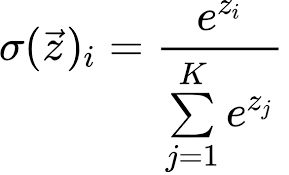

In [33]:
# using softmax for normalization

denominator = np.sum(np.exp(list(attn_weights.values())))

for word, attn_weight in attn_weights.items():
    attn_weights[word] = np.exp(attn_weight)/denominator

In [34]:
np.sum(list(attn_weights.values())) # normalized

1.0

In [36]:
attn_weights

{'Your': 9.725208739728227e-06,
 'journey': 0.08442869845685451,
 'is': 0.00012041197201536418,
 'one': 0.8718881910539299,
 'step': 0.02064511564564765,
 'at': 0.0026679062140392527,
 'a': 0.019831699600692792,
 'time': 0.00040825184808084247}

In [47]:
import torch
import torch.nn as nn

In [50]:
softmax = nn.Softmax()

softmax(torch.tensor(list(attn_weights.values())))

/opt/homebrew/Caskroom/miniforge/base/envs/ml-env/lib/python3.11/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([0.1050, 0.1143, 0.1050, 0.2511, 0.1072, 0.1053, 0.1071, 0.1050],
       dtype=torch.float64)

In [44]:
torch.softmax(torch.tensor(list(attn_weights.values())),dim=0).sum()

tensor(1., dtype=torch.float64)